<a href="https://colab.research.google.com/github/Md7tz/Machine-learning-notebooks/blob/master/Computer_Vision_with_Tensorflow_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer vision with TensorFlow

## Get the data

2 classes adopted from [Food 101](https://www.kaggle.com/dansbecker/food-101).

In [1]:
import zipfile

!wget -N https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file

with zipfile.ZipFile("pizza_steak.zip") as file:
  file.extractall()

--2021-10-16 15:17:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   177MB/s    in 0.6s    

2021-10-16 15:17:41 (177 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data

In [2]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('./pizza_steak'):
  print(f"The are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

The are 2 directories and 1 images in './pizza_steak'.
The are 2 directories and 1 images in './pizza_steak/train'.
The are 0 directories and 750 images in './pizza_steak/train/pizza'.
The are 0 directories and 750 images in './pizza_steak/train/steak'.
The are 2 directories and 1 images in './pizza_steak/test'.
The are 0 directories and 250 images in './pizza_steak/test/pizza'.
The are 0 directories and 250 images in './pizza_steak/test/steak'.


In [4]:
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Oct 16 15:17 .
drwxr-xr-x 1 root root 4096 Oct 16 15:17 ..
-rw-r--r-- 1 root root 6148 Oct 16 15:17 .DS_Store
drwxr-xr-x 4 root root 4096 Oct 16 15:17 test
drwxr-xr-x 4 root root 4096 Oct 16 15:17 train


In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names = class_names[1:]  # discard .DS_Store
print(class_names)
os.path.join(data_dir, 'test')

['pizza' 'steak']


'pizza_steak/train/test'

In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  images_dir = os.path.join(target_dir, target_class)
  img_name = random.choice(os.listdir(images_dir))
  # rand_index = random.randint(0, len(images))
  img = mpimg.imread(os.path.join(images_dir, img_name))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Name: {img_name} Shape: {img.shape}") # show the shape of the image
  return img

Name: 2724554.jpg Shape: (342, 512, 3)


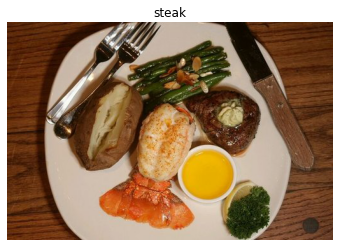

In [8]:
# View a random image from the training data set 
img = view_random_image(data_dir, "steak")

> Images are tensors with different pixels values with rgb channels ranging from 0-255


In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(342, 512, 3), dtype=uint8, numpy=
array([[[ 77,  23,   0],
        [ 80,  26,   0],
        [ 83,  29,   1],
        ...,
        [ 70,  34,  12],
        [ 68,  33,  11],
        [ 66,  31,  11]],

       [[ 91,  40,  13],
        [ 91,  40,  13],
        [ 91,  40,  13],
        ...,
        [ 69,  33,  11],
        [ 69,  33,  11],
        [ 67,  31,   9]],

       [[ 86,  39,  13],
        [ 86,  39,  13],
        [ 86,  36,  11],
        ...,
        [ 68,  32,  10],
        [ 68,  32,  10],
        [ 65,  29,   7]],

       ...,

       [[107,  47,  11],
        [104,  44,   8],
        [ 99,  39,   3],
        ...,
        [ 94,  53,  31],
        [ 95,  54,  32],
        [ 96,  55,  33]],

       [[109,  49,  13],
        [107,  47,  11],
        [105,  45,   9],
        ...,
        [104,  63,  41],
        [103,  62,  40],
        [103,  62,  40]],

       [[104,  44,   8],
        [105,  45,   9],
        [107,  47,  11],
        ...,
        [ 95,  54,  3

In [10]:
# View image shape -> returns width, height, color channels
img.shape

(342, 512, 3)

Normalize - scale from (0 - 255) to (0 - 1) 

In [11]:
# Normalize pixel values
img/255.

array([[[0.30196078, 0.09019608, 0.        ],
        [0.31372549, 0.10196078, 0.        ],
        [0.3254902 , 0.11372549, 0.00392157],
        ...,
        [0.2745098 , 0.13333333, 0.04705882],
        [0.26666667, 0.12941176, 0.04313725],
        [0.25882353, 0.12156863, 0.04313725]],

       [[0.35686275, 0.15686275, 0.05098039],
        [0.35686275, 0.15686275, 0.05098039],
        [0.35686275, 0.15686275, 0.05098039],
        ...,
        [0.27058824, 0.12941176, 0.04313725],
        [0.27058824, 0.12941176, 0.04313725],
        [0.2627451 , 0.12156863, 0.03529412]],

       [[0.3372549 , 0.15294118, 0.05098039],
        [0.3372549 , 0.15294118, 0.05098039],
        [0.3372549 , 0.14117647, 0.04313725],
        ...,
        [0.26666667, 0.1254902 , 0.03921569],
        [0.26666667, 0.1254902 , 0.03921569],
        [0.25490196, 0.11372549, 0.02745098]],

       ...,

       [[0.41960784, 0.18431373, 0.04313725],
        [0.40784314, 0.17254902, 0.03137255],
        [0.38823529, 0

## Architecture of a CNN
- Input image(s) 
- Input Layer
- Convolutional Layer
- Hidden Activation
- Pooling Layer
- Fully connected layer (Dense)
- Output layer
- Output Activation

 Steps
 * Load images
 * Preprocess images 
 * Build a CNN
 * Compile our CNN
 * Fit to training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set random seed
tf.random.set_seed(42)

# Preprocess data 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Get datadirs paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from dirs and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  # tf.keras.layers.Activations(tf.nn.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 251ms/step - loss: 0.5411 - accuracy: 0.7400 - val_loss: 0.3758 - val_accuracy: 0.8540
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4156 - accuracy: 0.8167 - val_loss: 0.3245 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4048 - accuracy: 0.8273 - val_loss: 0.3193 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3516 - accuracy: 0.8493 - val_loss: 0.3238 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3346 - accuracy: 0.8533 - val_loss: 0.2906 - val_accuracy: 0.8660


In [13]:
len(train_data), 1500/32

(47, 46.875)

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using a non CNN model with the data to test the difference 

In [15]:
# Set a random seed
tf.random.set_seed(42)

# Create the model
non_cnn_model = tf.keras.Sequential()
non_cnn_model.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
non_cnn_model.add(tf.keras.layers.Dense(4, activation="relu"))
non_cnn_model.add(tf.keras.layers.Dense(4, activation="relu"))
non_cnn_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
non_cnn_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      metrics=["accuracy"])

# Fit the model
history_2 = non_cnn_model.fit(train_data, 
                              epochs=5,
                              steps_per_epoch=len(train_data),
                              validation_data=valid_data,
                              validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 0.9054 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
non_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 3.2429 - accuracy: 0.6267 - val_loss: 0.6400 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.9868 - accuracy: 0.7007 - val_loss: 0.6452 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.8544 - accuracy: 0.7073 - val_loss: 0.5150 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5909 - accuracy: 0.7527 - val_loss: 0.5626 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.8923 - accuracy: 0.6867 - val_loss: 0.7167 - val_accuracy: 0.6700


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification steps:
1. Get the data / visualize the data 
2. Preprocess the data (Scaling/Normalizing & turning data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust hyperparamaters to improve the model


## 1. Visualize the data

Name: 1123386.jpg Shape: (512, 384, 3)
Name: 2357281.jpg Shape: (512, 512, 3)


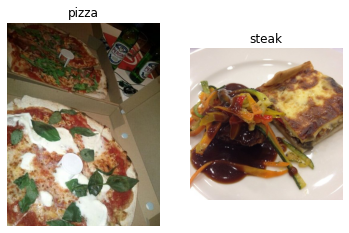

In [19]:
# Visualize
plt.figure()
plt.subplot(1, 2, 1)
pizza_img = view_random_image("pizza_steak/train", "pizza")
plt.subplot(1, 2, 2)
steak_img = view_random_image("pizza_steak/train", "steak")

## 2. Preprocess the data

In [20]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Turn data into batches

In [21]:
# Create train and test data generators and rescale the data (Normalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Load image data from directories
# Turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               seed=42)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
# Number of batches
len(train_data)

47

In [25]:
images[:1], images[1].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

# Create a baseline CNN model 

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
# Create the model  
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid', # output shape gets compressed
         input_shape=(224, 224, 3),
         activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid"),
]) 

In [28]:
# Compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [29]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit the model
history_4 = model_4.fit(train_data,  # X & y 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))  

Epoch 1/5
47/47 [==============================] - 13s 254ms/step - loss: 1.3746 - accuracy: 0.6353 - val_loss: 0.5331 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4917 - accuracy: 0.7833 - val_loss: 0.4620 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4013 - accuracy: 0.8267 - val_loss: 0.4077 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 11s 238ms/step - loss: 0.2623 - accuracy: 0.8993 - val_loss: 0.4201 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1190 - accuracy: 0.9647 - val_loss: 0.5262 - val_accuracy: 0.7900


In [31]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 161ms/step - loss: 0.2906 - accuracy: 0.8660


[0.2906055748462677, 0.8659999966621399]

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

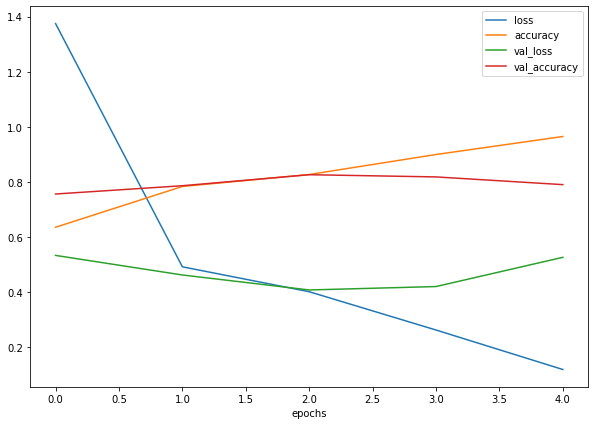

In [33]:
# Plot training curves  
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7), xlabel="epochs")

In [34]:
history_4.history

{'accuracy': [0.6353333592414856,
  0.7833333611488342,
  0.8266666531562805,
  0.8993333578109741,
  0.9646666646003723],
 'loss': [1.3745701313018799,
  0.4916822016239166,
  0.4013156294822693,
  0.2623087167739868,
  0.11899245530366898],
 'val_accuracy': [0.7559999823570251,
  0.7860000133514404,
  0.8259999752044678,
  0.8180000185966492,
  0.7900000214576721],
 'val_loss': [0.5331253409385681,
  0.46204763650894165,
  0.40769433975219727,
  0.4200848340988159,
  0.5261751413345337]}

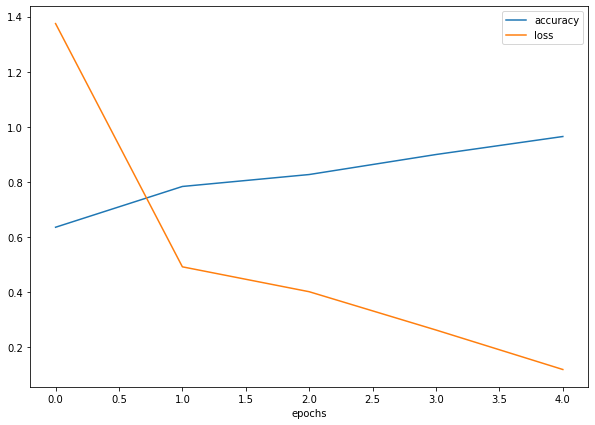

In [35]:
pd.DataFrame(history_4.history)[["accuracy", "loss"]].plot(figsize=(10, 7), xlabel="epochs")

In [36]:
def plot_loss_curves(history):
  """
  Return Separate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(loss))

  # plot loss curves
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title("loss")
  plt.legend()

  plt.figure()

  # plot accuracy curves
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="validation accuracy")
  plt.title("accuracy")
  plt.legend()

🔑**Note:** when a model's validation loss starts to increase it highly likely that the model is **overfitting**  

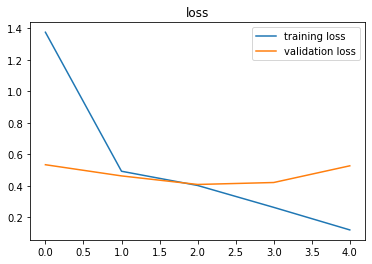

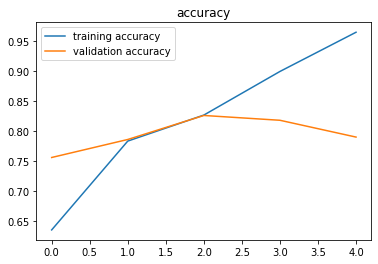

In [37]:
plot_loss_curves(history_4)

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline model
2. Beat the baseline model by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer 

Ways to reduce overfitting:

1. Add data augmentation
2. Add regularization layers such as MaxPool2D
3. Add more data

In [38]:
# Create the model (new baseline)
model_5 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)
  ),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [39]:
# Compile the model
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 229ms/step - loss: 0.6559 - accuracy: 0.6147 - val_loss: 0.5897 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4962 - accuracy: 0.7580 - val_loss: 0.4585 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4789 - accuracy: 0.7840 - val_loss: 0.4238 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 10s 224ms/step - loss: 0.4406 - accuracy: 0.8147 - val_loss: 0.4051 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4237 - accuracy: 0.8140 - val_loss: 0.3764 - val_accuracy: 0.8500


In [41]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

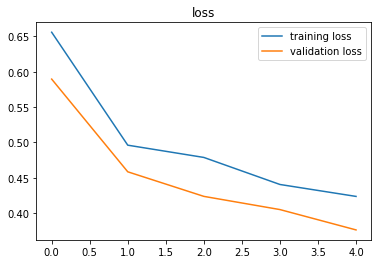

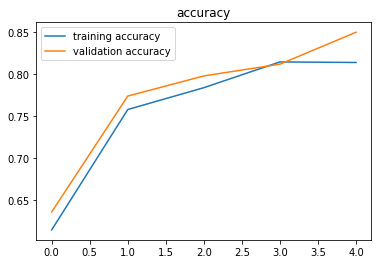

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                            #  width_shift_range=0.2,
                                            #  height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)

> Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

In [44]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   shuffle=False)

# Create non augmented train data batches
print("Non Augmented training data")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=False)

# Create non augmented test data batches
print("Non Augmented test data")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [45]:
images, _ = train_data.next()
augmented_images, _ = train_data_augmented.next()

Image number: 24


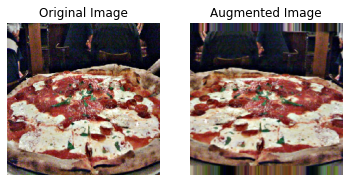

In [46]:
import random

i = random.randint(0, 32)
print(f"Image number: {i}")

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(images[i])
plt.title("Original Image")
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[i])
plt.title("Augmented Image")
plt.axis(False);

In [47]:
### Create a model using augmented data

In [48]:
# Set random seed for reproducability
tf.random.set_seed(42)

# Create the model
model_6 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         padding='valid',
         input_shape=(224, 224, 3),
         activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid'),
])

# Compile the model
model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6951 - accuracy: 0.5580 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 25s 539ms/step - loss: 0.7277 - accuracy: 0.4860 - val_loss: 0.6721 - val_accuracy: 0.7060
Epoch 3/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6808 - accuracy: 0.6420 - val_loss: 0.6564 - val_accuracy: 0.6100
Epoch 4/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6824 - accuracy: 0.6013 - val_loss: 0.6240 - val_accuracy: 0.6700
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6999 - accuracy: 0.5607 - val_loss: 0.6793 - val_accuracy: 0.6020


In [49]:
model_6.evaluate(test_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.6793 - accuracy: 0.6020


[0.6793223023414612, 0.6019999980926514]

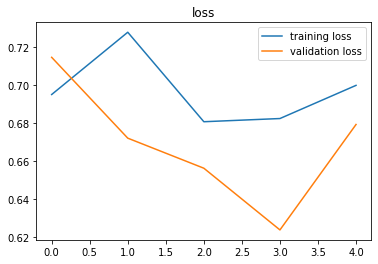

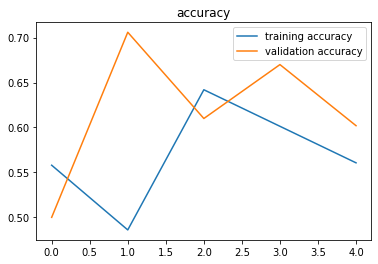

In [50]:
# Check the training curves
plot_loss_curves(history_6)

In [51]:
# try using shuffled data
print("Augmented training data shuffled")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   shuffle=True)

Augmented training data shuffled
Found 1500 images belonging to 2 classes.


In [52]:
# Set random seed for reproducability
tf.random.set_seed(42)

# Create the model
model_7 = Sequential([
  Conv2D(filters=32,
         kernel_size=3,
         padding='valid',
         input_shape=(224, 224, 3),
         activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid'),
])

# Compile the model
model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 32s 617ms/step - loss: 0.6504 - accuracy: 0.6167 - val_loss: 0.5025 - val_accuracy: 0.7980
Epoch 2/10
47/47 [==============================] - 27s 571ms/step - loss: 0.4811 - accuracy: 0.7753 - val_loss: 0.4151 - val_accuracy: 0.8080
Epoch 3/10
47/47 [==============================] - 27s 575ms/step - loss: 0.4469 - accuracy: 0.8013 - val_loss: 0.3258 - val_accuracy: 0.8580
Epoch 4/10
47/47 [==============================] - 27s 582ms/step - loss: 0.4178 - accuracy: 0.8260 - val_loss: 0.3484 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 27s 573ms/step - loss: 0.4421 - accuracy: 0.8033 - val_loss: 0.3225 - val_accuracy: 0.8760
Epoch 6/10
47/47 [==============================] - 27s 575ms/step - loss: 0.3815 - accuracy: 0.8413 - val_loss: 0.2895 - val_accuracy: 0.8840
Epoch 7/10
47/47 [==============================] - 27s 567ms/step - loss: 0.3848 - accuracy: 0.8387 - val_loss: 0.2464 - val_accuracy: 0.9100

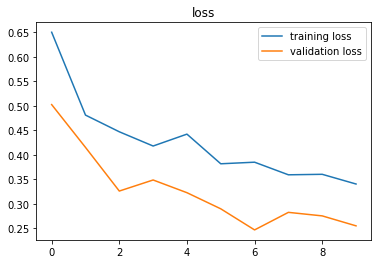

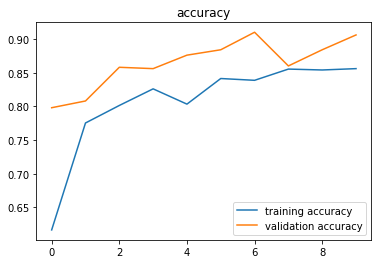

In [53]:
plot_loss_curves(history_7)

## Make a prediction with our trained model on custom data

In [54]:
print(class_names)

['pizza' 'steak']


In [55]:
# View our example image
!wget -N https://www.foodrepublic.com/wp-content/uploads/2012/05/testkitchen_argentinesteak-1280x560.jpg

steak = mpimg.imread("testkitchen_argentinesteak-1280x560.jpg")

--2021-10-16 15:31:19--  https://www.foodrepublic.com/wp-content/uploads/2012/05/testkitchen_argentinesteak-1280x560.jpg
Resolving www.foodrepublic.com (www.foodrepublic.com)... 23.185.0.3, 2620:12a:8000::3, 2620:12a:8001::3
Connecting to www.foodrepublic.com (www.foodrepublic.com)|23.185.0.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241336 (236K) [image/jpeg]
Saving to: ‘testkitchen_argentinesteak-1280x560.jpg’

testkitchen_argenti 100%[===================>] 235.68K  --.-KB/s    in 0.02s   

2021-10-16 15:31:19 (9.39 MB/s) - ‘testkitchen_argentinesteak-1280x560.jpg’ saved [241336/241336]



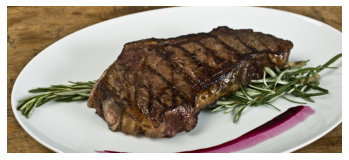

In [56]:
plt.imshow(steak)
plt.axis(False);

In [57]:
steak.shape

(560, 1280, 3)

In [58]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_img(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and 
  reshapes it to (img_shape, img_shape, color_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [59]:
# load and preprocess our custom image
steak = load_and_prep_img("./testkitchen_argentinesteak-1280x560.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.36008403, 0.2502801 , 0.09530812],
        [0.34684873, 0.23312326, 0.06113445],
        [0.3434874 , 0.22976191, 0.06085434],
        ...,
        [0.6186274 , 0.49313724, 0.30882353],
        [0.60322124, 0.47380945, 0.29733887],
        [0.5711488 , 0.4574233 , 0.28683507]],

       [[0.37808123, 0.2720588 , 0.12254902],
        [0.4167367 , 0.29320726, 0.11967787],
        [0.42156863, 0.2990196 , 0.11533613],
        ...,
        [0.60735244, 0.48578385, 0.30308095],
        [0.59320724, 0.47163865, 0.2990896 ],
        [0.56302536, 0.45056057, 0.2773812 ]],

       [[0.4964986 , 0.37135854, 0.19187675],
        [0.5137955 , 0.37457982, 0.18228291],
        [0.50910366, 0.36757702, 0.18781513],
        ...,
        [0.57429963, 0.46155456, 0.27822122],
        [0.555182  , 0.43949574, 0.2669467 ],
        [0.5186972 , 0.4098737 , 0.25006977]],

       ...,

       [[0.5696778 , 0.44614846, 0.2510504 ],
        [0.51

In [60]:
tf.expand_dims(steak, axis=0).shape
expanded_steak = tf.expand_dims(steak, axis=0)

In [61]:
pred_prob = model_7.predict(expanded_steak)

In [62]:
pred_class = class_names[int(tf.round(pred_prob))]
pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, classes=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """

  # Import the target image and preprocess it
  img = load_and_prep_img(filename)

  # Make a prediction
  pred_prob = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred_prob))]

  # Plot the image and predicted class
  plt.imshow(img)
  # plt.title("{} with accuracy {:.1f}%".format(pred_class.capitalize(), (pred_prob[0][0]*100)))
  plt.title(f"Prediction: {pred_class.capitalize()}")
  plt.axis(False)

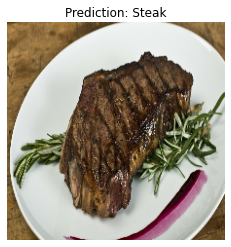

In [64]:
pred_and_plot(model_7, "./testkitchen_argentinesteak-1280x560.jpg")

In [65]:
!wget -N https://media-cdn.tripadvisor.com/media/photo-s/0a/8d/13/73/pizza-in-viet-emotion.jpg
pizza = mpimg.imread("./pizza-in-viet-emotion.jpg")

--2021-10-16 15:31:20--  https://media-cdn.tripadvisor.com/media/photo-s/0a/8d/13/73/pizza-in-viet-emotion.jpg
Resolving media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)... 151.101.2.38, 151.101.66.38, 151.101.130.38, ...
Connecting to media-cdn.tripadvisor.com (media-cdn.tripadvisor.com)|151.101.2.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29893 (29K) [image/jpeg]
Saving to: ‘pizza-in-viet-emotion.jpg’

pizza-in-viet-emoti 100%[===================>]  29.19K  --.-KB/s    in 0.001s  

2021-10-16 15:31:20 (22.0 MB/s) - ‘pizza-in-viet-emotion.jpg’ saved [29893/29893]



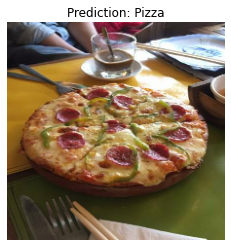

In [66]:
pred_and_plot(model_7, "./pizza-in-viet-emotion.jpg")